#第4章: 形態素解析

#####夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](https://nlp100.github.io/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は[matplotlib](http://matplotlib.org/)もしくは[Gnuplot](http://www.gnuplot.info/)を用いるとよい．

In [ ]:
!pip install mecab-python3 unidic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic: filename=unidic-1.1.0-py3-none-any.whl size=7405 sha256=0e8d145a946838b38783dbd89ded468b0911ff95aaad201364070353dc617df7
  Stored in directory: /root/.cache/pip/wheels/7a/72/72/1f3d654c345ea69d5d51b531c90daf7ba14cc555eaf2c64ab0
Successfully built unidic
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully uninstalled wasabi-1.1.2


In [ ]:
!python -m unidic download

download url: https://cotonoha-dic.s3-ap-northeast-1.amazonaws.com/unidic-3.1.0.zip
Dictionary version: 3.1.0+2021-08-31
unidic-3.1.0.zip: 100% 526M/526M [00:29<00:00, 17.7MB/s]
Finished download.
Downloaded UniDic v3.1.0+2021-08-31 to /usr/local/lib/python3.10/dist-packages/unidic/dicdir


In [ ]:
import MeCab
import unidic
mecab = MeCab.Tagger()
with open("/content/drive/MyDrive/Colab Notebooks/100-knock/neko.txt", "r") as f, open("/content/drive/MyDrive/Colab Notebooks/100-knock/neko.txt.mecab", "w") as f2:
    lines = f.readlines()
    for text in lines:
        result = mecab.parse(text)
        f2.write(result)


#30. 形態素解析結果の読み込みPermalink

#####形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/100-knock/neko.txt.mecab", "r") as f:
  general_list = []
  neko_list = []
  lines = f.readlines()
  for text in lines:
    neko_dic = {}
    suf = text.split("\t")
    if suf[0] == "EOS\n":
      continue
    temp = suf[1].split(',')
    neko_dic["surface"] = suf[0]
    if len(temp) <= 7:
      neko_dic["base"] = suf[0]
    else:
      neko_dic["base"] = temp[7]
    neko_dic["pos"] = temp[0]
    neko_dic["pos1"] = temp[1]
    neko_list.append(neko_dic)
    if suf[0]=="。":
      general_list.append(neko_list)
      neko_list = []
general_list #今後の問題で使います


[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数詞'},
  {'surface': '\u3000', 'base': '\u3000', 'pos': '空白', 'pos1': ''},
  {'surface': '吾輩', 'base': '我が輩', 'pos': '代名詞', 'pos1': ''},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': ''},
  {'surface': 'ある', 'base': '有る', 'pos': '動詞', 'pos1': '非自立可能'},
  {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': '未だ', 'pos': '副詞', 'pos1': ''},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '非自立可能'},
  {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '空白', 'pos1': ''},
  {'surface': 'どこ', 'base': '何処', 'pos': '代名詞', 'pos1': ''},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞

#31. 動詞

#####動詞の表層形をすべて抽出せよ．

In [ ]:
suf_list = []
for sentense in general_list:
    for text in sentense:
        if text["pos"] == "動詞":
            suf_list.append(text["surface"])
verb = set(suf_list)
verb


{'惹か',
 '釣る',
 '響け',
 '繰り返えさ',
 '謁し',
 '凹ん',
 '崇め',
 'しよう',
 '通う',
 '間に合わ',
 'のしかから',
 '処する',
 '限っ',
 '這い出そう',
 '悔やん',
 'すん',
 '突っ立っ',
 '見えん',
 'やま',
 '切り付ける',
 '遊ばせ',
 '感ずる',
 'かない',
 'なで',
 '眠っ',
 '込め',
 'すすめる',
 '忘れ',
 '潜り',
 '汚れ',
 '考え出し',
 '比し',
 '睨め',
 '知ろう',
 'しゃくい上げ',
 '好み',
 '起る',
 '突き込ん',
 'あつまっ',
 '見せる',
 '行き詰る',
 '懸ける',
 '果す',
 '急き込ん',
 '張れれ',
 '焚け',
 '覚まし',
 '消える',
 '投',
 '保っ',
 '及ぼし',
 '収めん',
 'やん',
 '恐るる',
 '訴える',
 '来る',
 '逝い',
 'なぐりつける',
 '殺す',
 '拭き込ん',
 'おどかす',
 '恐れ入ら',
 'くらさ',
 '訳し',
 '捻り出し',
 '撲っ',
 '許す',
 '弁じ立てる',
 '寄ら',
 '覚し',
 'くっ',
 '出かさ',
 '取りとめ',
 '帰ら',
 '伝え',
 '噛ま',
 '寝転ろ',
 '褒め',
 '惹く',
 '教える',
 '叩き込み',
 '引きずっ',
 '逃げる',
 '遊び',
 '縛ら',
 '消す',
 '漂う',
 '打ちやら',
 '纏まる',
 '圧し',
 '考え付い',
 '初める',
 '仕り',
 '抛っ',
 '見れ',
 '驚き',
 '切り抜ける',
 '抱え込ん',
 'いただく',
 '劣る',
 '志す',
 '磨り潰し',
 '暮れれ',
 '盗ん',
 '惜しめ',
 '掛っ',
 '通り過ぎる',
 '疑っ',
 '引い',
 '溢れる',
 'すべり落ち',
 '上す',
 '忍ばし',
 '舞わし',
 'しまおう',
 '振り立て',
 'のばし',
 '溜っ',
 '強',
 '食い込ん',
 'まじり',
 '応える',
 '印せ',
 '申し渡し',
 '吸取り',
 '造っ',
 'ござっ',

#32. 動詞の基本形

#####動詞の基本形をすべて抽出せよ．



In [ ]:
base_list = []
for sentense in general_list:
    for text in sentense:
        if text["pos"] == "動詞":
            base_list.append(text["base"])
base_verb = set(base_list)
base_verb


{'通う',
 '処する',
 '連ねる',
 '追い出す',
 '縛り付ける',
 '引っ越す',
 '追い掛ける',
 '売り渡す',
 '切り付ける',
 '感ずる',
 '放る',
 '仰せる',
 '張り立てる',
 '打ち抜く',
 '酔っ払う',
 '見せる',
 '咲く',
 '読み直す',
 '消える',
 '見立てる',
 '訴える',
 '来る',
 '殺す',
 '弁じ立てる',
 '許す',
 '透き通る',
 '慌てる',
 '教える',
 '生まれ出でる',
 '逃げる',
 '数える',
 '尖む',
 '消す',
 '漂う',
 '思い掛ける',
 '喫する',
 '差し引く',
 '込める',
 '纏まる',
 '振り掛ける',
 '切り抜ける',
 '言い放つ',
 '劣る',
 '逃れる',
 '志す',
 '労わる',
 '通り過ぎる',
 '聞き付ける',
 '溢れる',
 '上す',
 '零す',
 '翻る',
 '勝たす',
 '乱れる',
 '急く',
 '突き通す',
 '飛び去る',
 '煮る',
 '廃する',
 '懲らしめる',
 'こびり付く',
 '流れ出す',
 '浸ける',
 'ぶら下げる',
 '付ける',
 '触る',
 '晒す',
 '騒ぎ立てる',
 '忍ばせる',
 '見上げる',
 '潜り込む',
 '着せる',
 '画する',
 '競う',
 '言い表わす',
 '踏み付ける',
 '忍び入る',
 '迷い込む',
 '差し出す',
 '掻き混ぜる',
 '聞き齧る',
 '組み合わせる',
 '担ぎ出す',
 '選る',
 '始まる',
 '奪い合う',
 '悔やむ',
 '要る',
 '見付かる',
 '決する',
 '手伝う',
 '塗る',
 '遡る',
 '企て及ぶ',
 '踏み込む',
 '取り付く',
 '曲げる',
 '思い付く',
 '取らす',
 '堪る',
 '切らす',
 '引き手繰る',
 '見張る',
 '飲み下す',
 '当たる',
 '見積もる',
 '吸い取る',
 '紛う',
 '立ち至る',
 '隠れる',
 '浮く',
 '卜する',
 '乗る',
 '燃える',
 '取り決める',
 '産する',
 '膨らす',
 '増す',
 '潜める',
 

#33. 「AのB」

#####2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [ ]:
no_list = []
for sentense in general_list:
    for i in range(len(sentense)):
        if sentense[i]["surface"] == "の" and sentense[i-1]["pos"]=="名詞" and sentense[i+1]["pos"]=="名詞":
            no_list.append(sentense[i - 1]["surface"] + "の" + sentense[i + 1]["surface"])
no_list


['掌の上',
 '書生の顔',
 'はずの顔',
 '顔の真中',
 '穴の中',
 '書生の掌',
 '掌の裏',
 '藁の上',
 '笹原の中',
 '池の前',
 '一樹の蔭',
 '垣根の穴',
 '隣家の三毛',
 '時の通路',
 '一刻の猶予',
 '家の内',
 '以外の人間',
 '前の書生',
 '胸の痞',
 '家の主人',
 '主人の方',
 'なしの小猫',
 '鼻の下',
 '自分の住家',
 '家のもの',
 'うちのもの',
 '本の上',
 '皮膚の色',
 '本の上',
 '以外のもの',
 '主人の傍',
 '膝の上',
 '経験の上',
 '飯櫃の上',
 '炬燵の上',
 'うちの小供',
 '小供の寝床',
 '小供の一人',
 '例の神経',
 '次の部屋',
 '自分の勝手',
 'へっついの中',
 '台所の板の間',
 '家の書生',
 '裏の池',
 '親子の愛',
 '隣りの三毛',
 '目刺の頭',
 '鰡の臍',
 '軍人の家',
 '代言の主人',
 '教師の家',
 '猫の時節',
 '家の主人',
 '胃弱の癖',
 '後架の中',
 '平の宗盛',
 '月の月給',
 '主人の述懐',
 '金縁の眼鏡',
 '主人の顔',
 '室内の想像',
 '訳のもの',
 '利の大家',
 '金縁の裏',
 '顔のあたり',
 '上乗の出来',
 '顔の造作',
 '他の猫',
 '斑入りの皮膚',
 '主人の彩色',
 '一種の色',
 '身内の筋肉',
 '主人の予定',
 '座敷の中',
 '人の気',
 '自己の力量',
 '人間の不徳',
 '家の裏',
 'うちの小供',
 '日の二',
 'たこの茶園',
 '茶の木',
 '木の根',
 '西側の杉垣',
 '杉垣のそば',
 '他の庭内',
 '皮膚の上',
 '柔毛の間',
 '嘆賞の念',
 '好奇の心',
 '小春の風',
 '杉垣の上',
 '梧桐の枝',
 '枯菊の茂み',
 '真丸の眼',
 '人間の珍重',
 '双眸の奥',
 '額の上',
 '声の底',
 '教師の家',
 '良家の猫',
 '車屋の黒',
 '車屋の黒',
 '主義の的',
 '軽侮の念',
 '左の問答',
 '車屋の方',
 'うちの主人',
 '車屋

#34. 名詞の連接

#####名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [ ]:
noun_list = []
for sentense in general_list:
    count = 0
    sent = ""
    for i in range(len(sentense)):
        if sentense[i]["pos"] == "名詞":
            count += 1
            sent += sentense[i]["surface"]
        else:
            if count >= 2:
              noun_list.append(sent)
            count = 0
            sent = ""
noun_set = set(noun_list)
noun_set


{'自慢話し',
 '袷一',
 '一粒',
 'manyaslip',
 '出来損い',
 'すべて駄目',
 '武士町人',
 '男一人',
 '四時十五分前頃',
 '十分間',
 '少々談話',
 '男子水島寒月',
 '綿ネル',
 '乱暴猫',
 'ガラス球',
 '通り風呂場',
 '三四梃一度',
 '九時頃',
 '一挙両得',
 '東京市中',
 'ヴァルカン',
 '区民一般',
 '浅草警察',
 '事骨',
 '一二町',
 '近頃材料払底',
 '一手専売',
 '山高帽',
 '平常罵倒',
 '上白シャツ',
 '鐘懸',
 '通り独逸語',
 'じめ念',
 '空也餅引掛',
 '時々寒月',
 '鵯越',
 '先刻洗濯石鹸',
 '西洋婦人',
 '一切寒月',
 '台場近辺',
 '神経胃弱',
 '前世紀',
 '男あり',
 '一積極',
 '緞帳役者',
 '手織木綿',
 '四畳半',
 '世間一般',
 '三箇月前',
 '一応頭',
 '座席争い',
 'こないだ保険会社',
 '荷厄介',
 'つくつく野郎',
 '滑稽文',
 '同距離',
 '少々俗気',
 '活動小切手',
 'ため他',
 '念入れ',
 '皆事',
 '花文字',
 '八畳',
 '上今',
 '二尺四方',
 '日本新聞',
 '直径一寸',
 '通り消極',
 '娑婆気',
 '権貴栄達',
 '午後一時',
 '庶境',
 '晩鼠',
 '東郷閣下',
 '六円',
 '香一',
 '軍国多事征露',
 '一分刈',
 '通り将軍',
 'ゴシック趣味',
 '横行濶歩',
 '近日詩集',
 '沈澱組',
 '世間話',
 '天才呼ばわり',
 '擂粉木',
 '多々良三平',
 '一ヵ年',
 '可申',
 '三味線',
 'ヴァイオリン談',
 'ちゃんちゃん姿',
 '名産吉備団子',
 '二六時',
 '撓り按排',
 '一心不乱',
 '小遣銭',
 '性行学才',
 '大詔煥発',
 '勇猛精進',
 '二八',
 '衣装道具',
 '懐旧談',
 '四時前',
 '活動切手',
 '百三十',
 '喜時',
 '音楽学校',
 '人間全体',
 '主人苦沙弥先生',
 '味淋',
 '言語同断',
 '通り多少瘋癲'

#35. 単語の出現頻度

#####文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [ ]:
#辞書に書き直す
import collections
word_list = []
for sentense in general_list:
    for i in range(len(sentense)):
        if sentense[i]["pos"] != "補助記号":
            word_list.append(sentense[i]["surface"])
c = collections.Counter(word_list)
c_sorted = c.most_common()
c_sorted


[('の', 9550),
 ('て', 7416),
 ('に', 7017),
 ('は', 6500),
 ('と', 6160),
 ('を', 6119),
 ('が', 5399),
 ('で', 4537),
 ('た', 3988),
 ('も', 3253),
 ('だ', 2719),
 ('し', 2536),
 ('ない', 2422),
 ('から', 2217),
 ('か', 2050),
 ('ある', 1726),
 ('ん', 1662),
 ('な', 1614),
 ('いる', 1255),
 ('事', 1212),
 ('する', 1055),
 ('もの', 1004),
 ('へ', 995),
 ('です', 977),
 ('君', 971),
 ('云う', 937),
 ('主人', 934),
 ('何', 715),
 ('御', 707),
 ('ね', 693),
 ('よう', 683),
 ('この', 655),
 ('その', 620),
 ('それ', 612),
 ('ば', 600),
 ('そう', 570),
 ('い', 552),
 ('なる', 538),
 ('よ', 498),
 ('一', 490),
 ('なら', 486),
 ('人', 486),
 ('吾輩', 481),
 ('さ', 480),
 ('これ', 472),
 ('ます', 462),
 ('じゃ', 447),
 ('どう', 413),
 ('\u3000', 411),
 ('なっ', 408),
 ('さん', 401),
 ('来', 383),
 ('ところ', 383),
 ('見', 366),
 ('時', 351),
 ('ず', 345),
 ('迷亭', 343),
 ('って', 333),
 ('ませ', 333),
 ('方', 321),
 ('いい', 319),
 ('なく', 313),
 ('まで', 312),
 ('れ', 304),
 ('上', 298),
 ('寒月', 286),
 ('まし', 283),
 ('人間', 279),
 ('顔', 277),
 ('先生', 274),
 ('見る', 273),
 ('ぬ', 270),
 

#36. 頻度上位10語

#####出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=25b87f9e13c45707f59edce43923deea6daa98a25eecf093e5bd90728399319d
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


<BarContainer object of 10 artists>

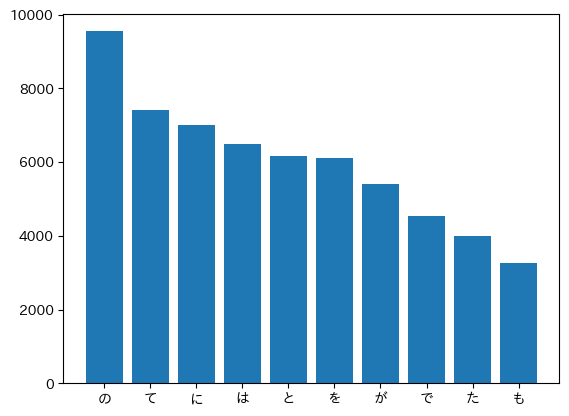

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import collections
%matplotlib inline
word_list = []
height_list = []
for i in range(10):
    word_list.append(c.most_common()[:10][i][0]) #cは前問で求める
    height_list.append(c.most_common()[:10][i][1])
plt.bar(x = word_list ,height = height_list)


#37. 「猫」と共起頻度の高い上位10語

#####「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<BarContainer object of 10 artists>

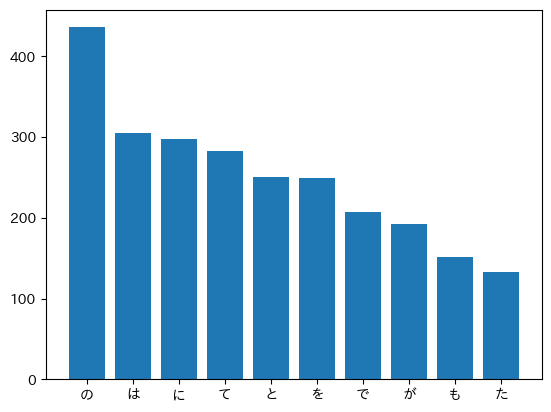

In [ ]:
#filter関数を使って書き直す
import itertools
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

neko_list = []
for sentense in general_list:
    text37 = []
    Flag = 0
    for text in sentense:
        if "猫" in text["surface"]:
            Flag = 1
            continue
        if text["pos"] != "補助記号":
            text37.append(text["surface"])
    if Flag == 1:
        neko_list.append(text37)
all_neko = list(itertools.chain.from_iterable(neko_list))
c = collections.Counter(all_neko)
word_list = []
height_list = []
for i in range(10):
    word_list.append(c.most_common()[:10][i][0])
    height_list.append(c.most_common()[:10][i][1])
plt.bar(x = word_list, height = height_list)


#38. ヒストグラム

#####単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

(array([6608., 2272., 1126.,  663.,  513.,  325.,  285.,  210.,  140.,
         119.,  108.,  103.,  101.,   91.,   63.,   68.,   59.,   63.,
          37.,   44.,   31.,   30.,   30.,   35.,   34.,   25.,   22.,
          43.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29.]),
 <BarContainer object of 28 artists>)

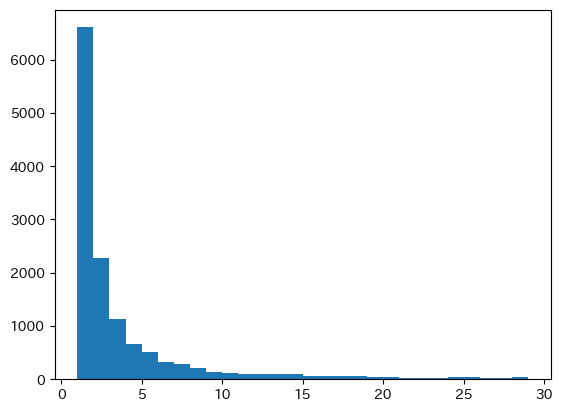

In [ ]:
import matplotlib.pyplot as plt
word_list = []
for sentense in general_list:
    for text in sentense:
        word_list.append(text["surface"])
data38 = collections.Counter(word_list)
plt.hist(data38.values(), range(1, 30)) #30はグラフへの描画数


#39. Zipfの法則Permalink

#####単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

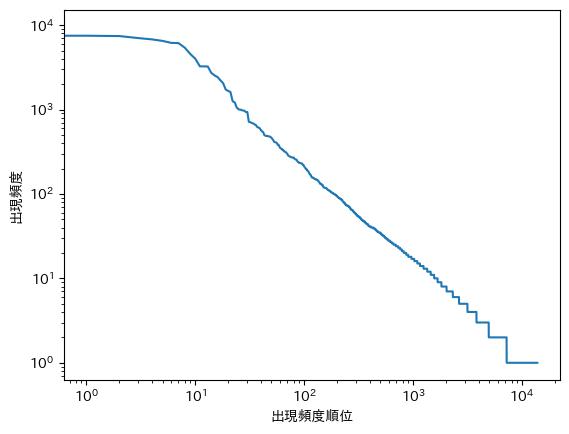

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
word_list = []
for sentense in general_list:
    for text in sentense:
        word_list.append(text["surface"])
data39 = collections.Counter(word_list)
temp2 = sorted((data39.values()), reverse = True)
plt.plot(temp2)
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
ax = plt.gca()
ax.set_yscale('log')  # メイン: y軸をlogスケールで描く
ax.set_xscale('log')
plt.show()
